1.닮은꼴 5인을 찾았는가? yes!  
2.0.5이상의 닮은 꼴이 있는가? no..b 날 절반이라도 닮은이가..이렇게 찾기 어렵다니..심지어 나 또한 나를 안 닮았다는 충격적인 사실이...    
3.다양하고 재미있는 결과 시각화를 시도하였다. yes! 마지막에 나를 가장 닮은 사람을 이미지로 확인해보았다. 


회고..

데이터가 ...진짜 중요한 것 같다.
그리고 코드가 익숙해지도록 cording_master를 열심히 해야겠다.
코드구현이 미숙하니깐 그 안에 심도있는 내용이 잘 보이지 않는다. 

이번 노드는 어떤 이미지가 컴퓨터가 인식하기 좋은지를 노가다로..알아보는 시간이었다. 
다음에 이 노드에 오게되면 꽤 그럴사하게 코드구현을 하고싶다!!!!
쫄지마

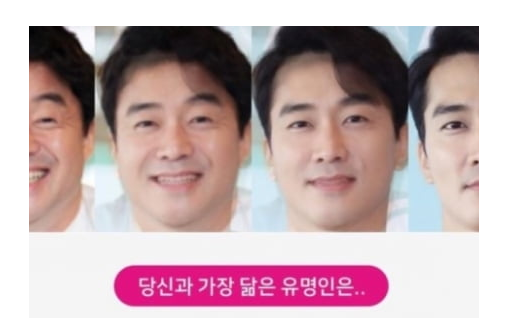

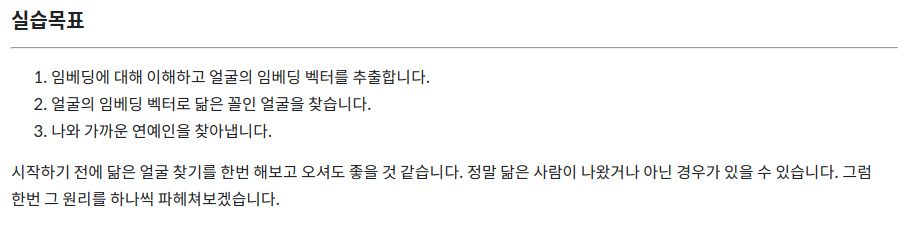

[(613, 1635, 1764, 485)]


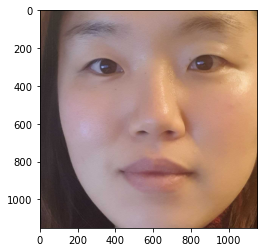

In [1]:
import face_recognition
import os
import numpy as np

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/minje1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    print(face_locations)
    
    a,b,c,d = face_locations[0]
    cropped_face = image[a:b,d:b,:]
    
    plt.imshow(cropped_face)
    
    return cropped_face

In [3]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['star108.jpeg', '크리스 햄스워스.jpg', 'star126.jpg', 'star110.jpg', '태양.jpeg', '개리.jpg', 'star23.jpg', '조정치.jpg', 'star37.jpg', 'star42.jpg', '이영하.jpg', '이재용.jpg', 'star1.jpg', '최민식.jpg', '김C.jpeg', 'minje.jpg', '황병국.jpg', 'star119.jpg', '채연.jpg', 'star125.jpg', 'star112.jpg', 'star109.jpeg', 'star20.jpg', '크리스 에반스.jpg', '케이.jpg', 'star51.jpg', 'star86.jpg', '트와이스쯔위.jpg', '김상호.png', '주진모(올드).jpg', 'star15.jpeg', '황정민.jpg', '조이.jpg', '케빈 스페이시.jpeg', 'star105.jpeg', '톰 홀랜드.jpg', '김경진.png', '트와이스다현.jpeg', '태연.jpg', '김래원.jpeg', '잭 블랙.jpeg', 'obama.jpg', '조원희.jpg', 'star38.png', 'star54.jpg', 'star41.jpg', '조승우.jpeg', '정수빈.jpg', 'star13.jpg', '트와이스미나.jpg', '제이콥 배털론.jpg', '이준혁.jpeg', '이종석.jpeg', 'star24.jpg', 'star9.jpg', '김유정.jpg', '지디.jpg', 'star113.jpg', '하정우.jpg', 'star5.jpg', '강동원.jpg', '잭 니콜슨.jpeg', '김고은.jpeg', '줄리엔강.png', 'star118.jpg', '지코.jpg', 'star57.jpg', 'star82.jpg', '잭 스페이더.jpeg', 'star60.jpg', '이동국.jpeg', '지호.jpg', '하승진.jpg', '트와이스정연.jpg', 'star12.jpg', '한기범.jpg', 'star

[(613, 1635, 1764, 485)]


[array([-0.13904515,  0.07721902,  0.05660767, -0.09273621, -0.10546436,
        -0.04104253, -0.03677265, -0.13905998,  0.11395128, -0.12819608,
         0.21426181, -0.10289039, -0.18406518, -0.07376487, -0.09655356,
         0.19965659, -0.18838018, -0.1332192 , -0.0644012 ,  0.01486627,
         0.11914641,  0.01775339, -0.01225106,  0.02872624, -0.12211718,
        -0.31751093, -0.0779328 , -0.04236946, -0.02916873, -0.02495877,
        -0.03817314,  0.10215954, -0.19105108, -0.00383594, -0.0027583 ,
         0.11564402, -0.03970453, -0.07808691,  0.14223941,  0.00842842,
        -0.22943902,  0.0448066 ,  0.01871618,  0.24368936,  0.19271173,
        -0.02830727,  0.05475698, -0.14228165,  0.12828007, -0.17176311,
        -0.04960305,  0.16800579,  0.05770412,  0.05907017,  0.00798437,
        -0.09263279,  0.04506004,  0.06895043, -0.06118899, -0.00930228,
         0.09709257, -0.09693435, -0.06868429, -0.16051957,  0.19986209,
         0.03273678, -0.15532063, -0.17098175,  0.1

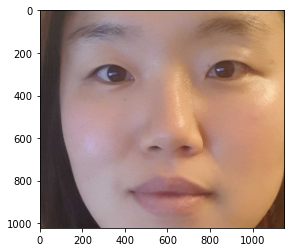

In [4]:
image_file = os.path.join(dir_path,'minje1.jpg')
face = get_gropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

[(86, 135, 176, 46)]
[(418, 849, 973, 295)]
[(66, 145, 156, 56)]
[(56, 163, 163, 55)]
[(57, 407, 242, 221)]
[(82, 382, 211, 253)]
[(192, 414, 415, 191)]
[(171, 349, 439, 82)]
[(241, 705, 562, 384)]
[(86, 155, 176, 66)]
[(98, 339, 253, 184)]
[(139, 283, 325, 97)]
[(260, 468, 528, 200)]
[(502, 946, 1168, 280)]
[(96, 253, 225, 124)]
[(869, 1763, 2019, 613)]
[(56, 414, 163, 306)]
[(72, 137, 146, 63)]
[(175, 282, 283, 175)]
[(76, 135, 166, 46)]
[(17, 69, 60, 26)]
[(68, 151, 175, 44)]
[(605, 707, 1067, 245)]
[(98, 218, 253, 64)]
[(231, 617, 498, 349)]
[(167, 414, 390, 191)]
[(241, 526, 562, 205)]
[(160, 407, 345, 221)]
[(134, 384, 455, 63)]
[(64, 390, 219, 236)]
[(348, 1118, 811, 656)]
[(263, 407, 449, 221)]
[(142, 438, 409, 171)]
[(118, 315, 341, 92)]
[(80, 151, 187, 44)]
[(333, 803, 718, 418)]
[(53, 253, 182, 124)]
[(133, 322, 288, 167)]
[(206, 419, 527, 98)]
[(47, 146, 121, 71)]
[(68, 163, 175, 55)]
[(98, 758, 284, 572)]
[(56, 424, 146, 335)]
[(63, 491, 384, 170)]
[(204, 803, 590, 418)]
[

array([-0.13904515,  0.07721902,  0.05660767, -0.09273621, -0.10546436,
       -0.04104253, -0.03677265, -0.13905998,  0.11395128, -0.12819608,
        0.21426181, -0.10289039, -0.18406518, -0.07376487, -0.09655356,
        0.19965659, -0.18838018, -0.1332192 , -0.0644012 ,  0.01486627,
        0.11914641,  0.01775339, -0.01225106,  0.02872624, -0.12211718,
       -0.31751093, -0.0779328 , -0.04236946, -0.02916873, -0.02495877,
       -0.03817314,  0.10215954, -0.19105108, -0.00383594, -0.0027583 ,
        0.11564402, -0.03970453, -0.07808691,  0.14223941,  0.00842842,
       -0.22943902,  0.0448066 ,  0.01871618,  0.24368936,  0.19271173,
       -0.02830727,  0.05475698, -0.14228165,  0.12828007, -0.17176311,
       -0.04960305,  0.16800579,  0.05770412,  0.05907017,  0.00798437,
       -0.09263279,  0.04506004,  0.06895043, -0.06118899, -0.00930228,
        0.09709257, -0.09693435, -0.06868429, -0.16051957,  0.19986209,
        0.03273678, -0.15532063, -0.17098175,  0.11766484, -0.10

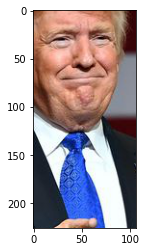

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['minje1']

In [7]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('minje1', 'minje2')

0.35236454323423727

In [8]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('minje2')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [9]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('minje2',
  array([-0.14529772,  0.06453087,  0.07429055, -0.09167374, -0.11836019,
         -0.02894751, -0.03725873, -0.13300031,  0.09814436, -0.16103217,
          0.21681699, -0.13003741, -0.23882161, -0.06064204, -0.03388364,
          0.24194036, -0.15872222, -0.14082609,  0.00036246, -0.00647261,
          0.08575281,  0.00051102,  0.02126207,  0.034668  , -0.15828323,
         -0.30770418, -0.09097139, -0.02483862, -0.0809769 , -0.06320326,
         -0.07178514,  0.09150866, -0.16690622, -0.01657301,  0.02055936,
          0.14667712, -0.01772878, -0.09567725,  0.17427519,  0.04003734,
         -0.26014188,  0.029449  ,  0.04897506,  0.27188161,  0.15131667,
         -0.02226349, -0.00524822, -0.1161834 ,  0.11810529, -0.17553954,
         -0.01989633,  0.10862626,  0.03718691,  0.01337362,  0.0040241 ,
         -0.12514938,  0.03446411,  0.1112895 , -0.14014257, -0.02463939,
          0.08904175, -0.08887158, -0.02537106, -0.17747162,  0.21146061,
          0.10092728, -0.1

In [14]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [16]:
get_nearest_face('minje1')

순위 1 : 이름(minje2), 거리(0.35236454323423727)
순위 2 : 이름(차명석), 거리(0.4251482037978634)
순위 3 : 이름(공효진), 거리(0.4252618767985301)
순위 4 : 이름(케이), 거리(0.43053761505232246)
순위 5 : 이름(정수빈), 거리(0.4331600643092963)
순위 6 : 이름(잇섭), 거리(0.44072287768920376)
순위 7 : 이름(RM), 거리(0.4424540309905126)
순위 8 : 이름(star19), 거리(0.4519055718025963)
순위 9 : 이름(이용진), 거리(0.4527513715415147)
순위 10 : 이름(star44), 거리(0.45286896101469476)


In [19]:
import matplotlib.image as img

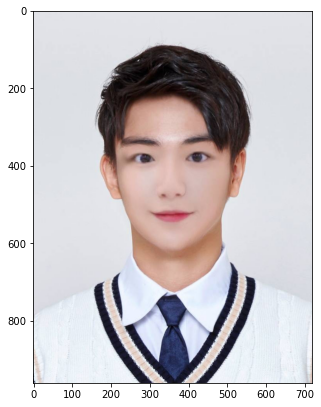

In [20]:
plt.figure(figsize = (5,10))
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images/star44.jpg'
ndarray = img.imread(image_path1)
plt.imshow(ndarray)